<img align="center" src="https://raw.githubusercontent.com/FUlyankin/Parsers/master/images%20/cats.jpg" height="1200" width="1200"> 

# Семинар 3: Основы статистики 

На этом семинаре мы поговорим про основы статистики. Мы уже вручную научились считать различные статистические характеристики. Пришло время посмотреть, как это делается на компьютере. В качестве датасета мы будем использовать датасет по ... вашим страницам вконтакте. Ох! Сколько же всего интересного можно найти в этом датасете...

## 1. Подгружаем данные 

In [1]:
import pandas as pd
%matplotlib inline 

In [2]:
df = pd.read_csv('../data/vk_download/vk_main.csv', sep='\t')

df.head(7)

,city,country,first_name,home_town,in_hse_memes_group,is_bmm,is_closed,last_name,likes_memes,uid,...,photo_month_mean,photo_repost_cnt,photo_repost_max,photo_repost_mean,photo_repost_median,photo_text_len_cnt,photo_ava_change_cnt,photo_text_url_len_cnt,friends_from_course_cnt,friends_mail_from_course_pct
0,Москва,Россия,Александра,Москва,True,True,False,Абашкова,60.0,182152789,...,1.333333,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,42.0,0.428571
1,Рязань,Россия,Анастасия,Рязань,True,True,False,Чуфистова,0.0,148020433,...,2.375000,2.0,1.0,0.105263,0.0,0.0,0.0,0.0,32.0,0.281250
2,Москва,Россия,Александр,Омск,False,True,False,Головачев,0.0,138413935,...,1.400000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,32.0,0.406250
3,NaN,NaN,Анна,NaN,False,True,False,Лобанова,0.0,366261055,...,4.166667,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,45.0,0.333333
4,NaN,Россия,Алексей,NaN,True,True,False,Пузырный,21.0,111252392,...,3.181818,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,41.0,0.341463
5,Москва,Россия,Александер,NaN,True,True,False,Гуляев,104.0,145109161,...,2.500000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,29.0,0.379310
6,Москва,Россия,Алина,NaN,True,True,False,Хабирова,6.0,140207230,...,1.200000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,31.0,0.225806


В табличке есть огромное количество самых разных переменных. Их названия довольно интуитивны. Будем разбираться с тем за что отвечает какая колонка по мере необходимости. Отметим только то, что все переменные разных типов. На основную информацию по ним можно посмотреть с помощью метода `.info()`. Напротив каждого названия столбца можно увидеть, сколько в нём заполненных ячеек. Например, у $328$ человек из $425$ (общее число строк) заполнен город проживания `city`.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 98 columns):
city                               328 non-null object
country                            364 non-null object
first_name                         425 non-null object
home_town                          112 non-null object
in_hse_memes_group                 425 non-null bool
is_bmm                             425 non-null bool
is_closed                          425 non-null bool
last_name                          425 non-null object
likes_memes                        384 non-null float64
uid                                425 non-null int64
male_dummy                         425 non-null int64
facebook_dummy                     425 non-null int64
instagram_dummy                    425 non-null int64
skype_dummy                        425 non-null int64
twitter_dummy                      425 non-null int64
home_phone_dummy                   425 non-null int64
mobile_phone_dummy         

Количество пропусков в данных можно узнать не только с помощью `.info()`, но ещё и, например, с помощью метода `.isnull()`.

In [5]:
df.isnull().head()  # возвращает True, если в ячейке пропуск, иначе --- False

,city,country,first_name,home_town,in_hse_memes_group,is_bmm,is_closed,last_name,likes_memes,uid,...,photo_month_mean,photo_repost_cnt,photo_repost_max,photo_repost_mean,photo_repost_median,photo_text_len_cnt,photo_ava_change_cnt,photo_text_url_len_cnt,friends_from_course_cnt,friends_mail_from_course_pct
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()  # суммарное количество пропусков в каждом столбце

city                                97
country                             61
first_name                           0
home_town                          313
in_hse_memes_group                   0
is_bmm                               0
is_closed                            0
last_name                            0
likes_memes                         41
uid                                  0
male_dummy                           0
facebook_dummy                       0
instagram_dummy                      0
skype_dummy                          0
twitter_dummy                        0
home_phone_dummy                     0
mobile_phone_dummy                   0
site_dummy                           0
can_post_dummy                       0
can_see_all_posts_dummy              0
can_see_audio_dummy                  0
can_write_private_message_dummy      0
has_mobile_dummy                     0
has_ava_dummy                        0
wall_comments_dummy                  0
english_dummy            

Метод `.shape` позволяет посмотреть на размер таблички (число строк и число столбиков).

In [7]:
df.shape

(425, 98)

## 2. Немного базовых навыков по работе с таблицами

Давайте вспомним базовые навыки по работе с таблицами в питоне. Чтобы вытащить столбец, у нему нужно через квадратные скобки обратиться по имени. Чтобы посмотреть на первые $10$ строк, можно вместо `.head(10)` воспользоваться срезом `[:10]`.

In [8]:
df['first_name'][:10]

0    Александра
1     Анастасия
2     Александр
3          Анна
4       Алексей
5    Александер
6         Алина
7         Алиса
8     Anastasia
9       Николай
Name: first_name, dtype: object

Срезы можно делать по любым условиям. Например, можно отобрать в табличку девушек не из Москвы, у которых в профиле есть ссылка на instagram:

In [9]:
# Можно аккуратно переносить строки кода в питоне для улучшения читаемости.
df[
    (df['instagram_dummy'] == 1)
    & (df['male_dummy'] == 0)
    & ((df['city'] != 'Москва') | (df['home_town'] != 'Москва'))
].head()

,city,country,first_name,home_town,in_hse_memes_group,is_bmm,is_closed,last_name,likes_memes,uid,...,photo_month_mean,photo_repost_cnt,photo_repost_max,photo_repost_mean,photo_repost_median,photo_text_len_cnt,photo_ava_change_cnt,photo_text_url_len_cnt,friends_from_course_cnt,friends_mail_from_course_pct
8,Москва,Россия,Anastasia,NaN,True,True,False,Biryukova,0.0,72089509,...,2.285714,2.0,1.0,0.125,0.0,0.0,0.0,0.0,47.0,0.191489
10,Москва,Россия,Анастасия,NaN,True,True,False,Шлапак,92.0,200200185,...,2.428571,0.0,0.0,0.000,0.0,0.0,0.0,0.0,24.0,0.333333
14,Москва,Россия,Анна,NaN,True,True,False,Кизим,11.0,318022418,...,1.000000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,28.0,0.285714
16,Москва,Россия,Milana,NaN,False,True,False,Borukaeva,1.0,268125862,...,1.166667,0.0,0.0,0.000,0.0,0.0,0.0,0.0,24.0,0.291667
22,Кострома,Россия,Дарья,NaN,True,True,False,Малышева,6.0,135097769,...,1.250000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,11.0,0.272727


Знак `&` говорит, что должны выполниться оба условия. Он читается как союз `и`.

Если мы хотим, чтобы выполнялось хотя бы одно из условий, можно использовать союз `или`, который обозначается значком `|`.

Значки `!=` отвечают за $\neq$.

Сами условия важно не забывать оборачивать в круглые скобки `()`, чтобы питон не запутался, что с чем сравнивается. Также они определяют порядок действий, как в математике.

То есть мы командой 

`(df['instagram_dummy'] == 1) & (df['male_dummy'] == 0) & ((df['city'] != 'Москва') | (df['home_town'] != 'Москва'))` 

говорим табличке: 

`(у них есть инстаграм) И (они девушки) И ((их город проживания НЕ москва) ИЛИ (их родной город НЕ Москва))` 

И на выход получаем маленькую подтаблицу, где __все__ эти условия выполнены.

__Важно__: если вы хотите вывести все строки в таблице, где столбец попадает в какой-то _диапазон_ значений, придётся написать $2$ условия на этот столбец (двойное неравенство не прокатит, увы). Например, выведем всех людей, у которых количество друзей, посещающих этот курс, от $100$ до $153$:

In [10]:
df[(df['friends_from_course_cnt'] > 100) & (df['friends_from_course_cnt'] < 153)].head()

,city,country,first_name,home_town,in_hse_memes_group,is_bmm,is_closed,last_name,likes_memes,uid,...,photo_month_mean,photo_repost_cnt,photo_repost_max,photo_repost_mean,photo_repost_median,photo_text_len_cnt,photo_ava_change_cnt,photo_text_url_len_cnt,friends_from_course_cnt,friends_mail_from_course_pct
116,NaN,NaN,Марго,NaN,True,True,False,Горлычева,65.0,294230568,...,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,125.0,0.376000
216,Москва,Россия,Егор,Москва,True,False,False,Покидов,4.0,28862742,...,2.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,104.0,0.490385
358,Москва,Россия,Мария,NaN,True,False,False,Назарова,22.0,107770210,...,4.416667,1.0,1.0,0.018868,0.0,0.0,0.0,0.0,106.0,0.490566
416,Москва,Россия,Янис,NaN,True,False,False,Ксенидис,5.0,166701060,...,2.750000,1.0,1.0,0.045455,0.0,0.0,0.0,0.0,107.0,0.495327


## 3. Описательная статистика в pandas

Мы с вами обсудили до этого довольно большое число разных статистических показателей. Давайте посмотрим как искать их в `pandas`.

> В статистике строчка датафрейма называется «наблюдением» (*observation*), а столбец — «переменной» (*variable*). Данные в столбце должны быть однородны (например, может быть столбец, состоящий только из чисел или только из строк, но не может быть столбца, в котором перемешаны строки и числа).

### 3.1 Максимальное и минимальное значения

Посмотрим, какое в таблице есть максимальное и минимальное количество фоток в профиле.

In [11]:
df.photos_cnt.max()

1822.0

In [12]:
df['photos_cnt'].min()

0.0

Обратите внимание, что мы можем обращаться к столбцам ещё и через точку (только если имя столбца не содержит пробелов / точек / запятых / и т.д.). Давайте посмотрим кто накопил такое большое число фоток в своём профиле. 

In [13]:
df[df.photos_cnt == df.photos_cnt.max()][['first_name','last_name']]

,first_name,last_name
214,Дуся,Шурмистова


### 3.2 Меры центральной тенденции (среднего уровня)

Меры центральной тенденции — показатели, представляющие собой ответ на вопрос: «На что похожа середина данных?». Середину можно описывать с помощью разных показателей! Давайте посмотрим на них. 

**Среднее значение**

Среднее не нуждается в представлении. Вычислить его довольно просто: сложите все значения и разделите полученную сумму на их количество.

$$
\bar {x} =  \frac {1}{n} \sum _{i=1}^{n}x_{i}
$$

В случае со средним значением «серединой» датасета будет среднее арифметическое его значений. Среднее значение отражает типичный показатель в наборе данных. Если мы случайно выберем один из показателей, то, скорее всего, получим значение, близкое к среднему.

Найдём среднее количество друзей, которое есть у первака.

In [14]:
df.friends_cnt.mean()

232.05411764705883

Это среднее значение говорит нам, что «типичный» первокурсник добавил к себе в друзяшки вконтакте $232$ человека.

**Медиана**

Медиана, как и среднее значение, нужна для определения типичного значения.

Чтобы найти медиану, данные нужно расположить в порядке возрастания. Медианой будет значение, которое совпадает с серединой набора данных. Если количество значений чётное, то берётся среднее двух значений, которые «окружают» середину.

In [15]:
df.friends_cnt.median()

185.0

Медианное число друзей составляет $185$ человек. Грубо говоря, получается, что у половины перваков меньше $185$ друзей, а у второй половины больше $185$ друзей. 

И медиана, и среднее значение отражают типичное значение. Когда в выборке нет выбросов, они примерно одинаковы. Если в выборке есть выбросы, то их довольно сильно разносит друг от друга, Например, если посмотреть на количество лайков, которое первак оставляет в паблике "ХАЕР СКУЛ ОФ МЕМЕС", можно увидеть, что среднее значение довольно сильно отличается от медианы.

In [16]:
df.likes_memes.mean()

24.447916666666668

In [17]:
df.likes_memes.median()

3.0

Какие-то деятели лайкают слишком много мемесов и смещают среднее вверх. Давайте посмотрим на гистограмму лайков и друзей.

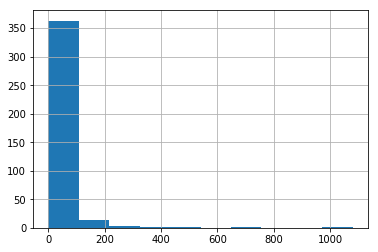

In [18]:
df.likes_memes.hist()

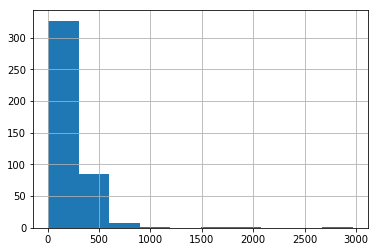

In [19]:
df.friends_cnt.hist()

Видели? У лайков очень длинный хвост. Какой-то деятель оставил в паблосе аж $\approx 1000$ лайков. Чем длиннее хвост, тем страшнее выбросы. У числа друзей хвост короче. Из-за этого среднее и медианное число друзей ближе друг к другу.

__Запомните на всю жизнь:__ выбросы - зло. Среднее значение чувствительно к выбросам, а медиана нет. 

**Мода**

Это последняя мера центральной тенденции, о которой пойдёт речь. Мода определяется как значение, которое наиболее часто встречается в наборе данных. Давайте посмотрим на самое модное число лайков.

In [20]:
df.likes_memes.mode()

0    0.0
dtype: float64

Обратите внимание, что, если значение появляется в данных неоднократно, оно приблизит среднее значение к моде. Чем чаще появляется значение, тем сильнее оно влияет на среднее. Таким образом, мода показывает наиболее значимый фактор, формирующий среднее значение.

Приятная особенность моды состоит в том, что её мы можем посмотреть не только для численных данных, но и для категориальных. Например, мы можем узнать какое имя на потоке самое частое. 

In [21]:
df.first_name.mode()

0    Дарья
dtype: object

С помощью ещё одного няшного метода `value_counts()` мы можем посмотреть на то, как часто оно встречалось. 

In [22]:
df.first_name.value_counts()[:10]

Дарья        12
Анна         11
Александр     9
Анастасия     9
Никита        8
Мария         7
Глеб          7
Иван          7
Полина        7
Кирилл        6
Name: first_name, dtype: int64

### 3.3 Меры разброса

Выше мы посмотрели на то насколько данные типичные. Кроме типичность интересно насколько жесткий в данных разброс. Наример, в случае лайков, хвост длиннее, чем в случае друзей. Разные меры разброса помогают понять это. Они отвечают на вопрос: «Как сильно варьируются мои данные?». Например, мы поняли, что типичное число друзей находится в районе $200$. Возникает вопрос, а на сколько больше или меньше может быть число друзей.

**Дисперсия и стандартное отклонение**

Давайте посмотрим на то, насколько число друзей отличается от среднего значения. Для этого будем брать число друзей $x_i$ и вычитать из него среднее, $\bar x$:

$$
(x_i - \bar x)
$$

Предположим, что среднее значение $30$. У парня по имени Ярополк $25$ друзей. У девушки по имени Рагнеда --- $35$. Получается, что Ярополк отличается от типичного первокурсника на $25 - 30 = -5$ друзей. А Рагнеда на $35 - 30 = 5$ друзей. Когда мы сложим эти различия, получится $0$. Разброса нет. А это неправда. Из-за этого обычно разность возводят в квадрат. Тогда получается, что разброс в выборке составляет $\frac{1}{2} \cdot((25-30)^2 + (35-30)^2) = 25$ квадратных друзей. 

Ещё квадрат нужен для того, чтобы подчеркнуть, что чем сильнее число друзей отличается от среднего, тем выше разброс. Посчитанная нами выше величина называется *дисперсией*

$$
\sigma^2= \frac{1}{n} \sum_{i=1}^{n} (x_{i}-{\bar {x}})^{2}
$$

Проблема дисперсии в том, что она измеряется в квадратных друзьях. Чтобы вернуться назад, к обычным друзьям, нужно извлечь из неё корень. Тогда получится величина, которая называется *среднеквадратическим отклонением* или *стандартным отклонением*. 

In [23]:
df.friends_cnt.var() # дисперсия, variance

52391.339045504996

In [24]:
df.friends_cnt.std() # стандартное отклонение, standard deviation

228.89154428572715

Часто дисперсию считают по формуле 

$$
\sigma^2= \frac{1}{n-1} \sum_{i=1}^{n} (x_{i}-{\bar {x}})^{2}
$$

Это правильнее. Почему --- вы узнаете на математической статистике. Пока что это за гранью нашего понимания. Просто свыкнитесь с этой мыслью до тех пор, пока не изучите теорию вероятностей. Когда изучите, можно начинать рефлексировать и уходить в астрал сигма-алгебр. 

Давайте вручную убедимся, что питон считает именно по такой формуле. Для этого вытащим в переменную `friends` число друзей. Иногда в табличке встречаются пропуски, которые обозначаются символом `NA` (not availible). Нужно избавиться от пропусков. Это помогает сделать метод `.dropna()`. Он выбросит все пропуски.

In [25]:
friends = df.friends_cnt.dropna() # выбросили все пропуски
n = friends.shape[0]      # узнали сколько всего осталось строк

# посчитали дисперсию по классной формуле, результат совпадает с методом .var()
sum((friends - friends.mean())**2) / (n - 1)

52391.33904550498

In [26]:
# посчитали дисперсию по недостаточно классной формуле, есть небольшое отличие от предыдущего значения
sum((friends - friends.mean())**2) / n

52268.065306574375

### 3.4 Метод describe

**Метод describe** считает всё и сразу! 

In [27]:
df.describe()

,likes_memes,uid,male_dummy,facebook_dummy,instagram_dummy,skype_dummy,twitter_dummy,home_phone_dummy,mobile_phone_dummy,site_dummy,...,photo_month_mean,photo_repost_cnt,photo_repost_max,photo_repost_mean,photo_repost_median,photo_text_len_cnt,photo_ava_change_cnt,photo_text_url_len_cnt,friends_from_course_cnt,friends_mail_from_course_pct
count,384.000000,4.250000e+02,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,...,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.0,376.000000,384.000000,384.000000
mean,24.447917,2.112358e+08,0.458824,0.002353,0.195294,0.051765,0.014118,0.028235,0.047059,0.110588,...,4.270131,0.353723,0.188830,0.014372,0.002660,0.227394,0.0,0.119681,31.979167,0.450759
std,80.102333,1.130256e+08,0.498889,0.048507,0.396894,0.221813,0.118115,0.165840,0.212014,0.313991,...,12.912769,1.703295,0.605735,0.064351,0.051571,3.044912,0.0,0.747644,18.632199,0.160002
min,0.000000,2.232686e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,5.000000,0.000000
25%,0.000000,1.405058e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,20.000000,0.333333
50%,3.000000,1.857325e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.625000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,28.000000,0.459993
75%,15.250000,2.579428e+08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,39.000000,0.560976
max,1081.000000,5.701148e+08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,151.833333,27.000000,8.000000,0.666667,1.000000,43.500000,0.0,9.000000,125.000000,1.000000


Для каждой переменной мы видим: 

* `count` - число наблюдений, которое есть без пропусков
* `mean` - среднее значение
* `std` - стандартное отклонение
* `min` -  минимум
* `max` -  максимум
* `50%` -  медиана (половина выборки больше неё, половина меньше)
* `25%` -  25% квантиль (четверть выборки меньше, 75% больше)
* `75%` -  75% квантиль

Можно построить такую же табличку только для категориальных переменных. 

In [28]:
df.describe(include='object')

,city,country,first_name,home_town,last_name,schools_cnt,relation_cat,life_main_cat,people_main_cat,political_cat,wall_emoji_trace,wall_text
count,328,364,425,112,425,46,193,162,163,12,205,311
unique,55,14,213,54,412,12,7,7,6,6,202,274
top,Москва,Россия,Дарья,Москва,Лобанова,а,не указано,0.0,0.0,умеренные,❤️,
freq,253,344,12,46,2,22,160,128,127,5,2,18


* `count` -  число наблюдений, которое есть без пропусков
* `unique` - число уникальных значений (категорий), которые принимает переменная
* `top` - мода для каждой категории
* `freq` - частота, с которой встречается мода

Кстати говоря, любой квантиль можно посчитать следующей функцией. Обратите внимание, что в качестве аргумента здесь пишется не значение процента $0-100$, а доля из диапазона $0-1$.

In [29]:
df.friends_cnt.quantile(0.95)

511.19999999999936

Выходит, что у $95\%$ людей из выборки меньше $511$ друзей, и у $5\%$ --- больше. Т.е. чтобы вывести топ-$5\%$ по дружелюбности, достаточно построить условие `количество друзей > квантиль-95`.

In [30]:
df[df.friends_cnt > df.friends_cnt.quantile(0.95)]

,city,country,first_name,home_town,in_hse_memes_group,is_bmm,is_closed,last_name,likes_memes,uid,...,photo_month_mean,photo_repost_cnt,photo_repost_max,photo_repost_mean,photo_repost_median,photo_text_len_cnt,photo_ava_change_cnt,photo_text_url_len_cnt,friends_from_course_cnt,friends_mail_from_course_pct
2,Москва,Россия,Александр,Омск,False,True,False,Головачев,0.0,138413935,...,1.400000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,32.0,0.406250
24,Москва,Россия,Владимир,Тирасполь,True,True,False,Загниборода,0.0,241412773,...,2.750000,2.0,1.0,0.060606,0.0,0.0,0.0,0.0,27.0,0.296296
25,NaN,NaN,Егор,Москва,False,True,False,Теплухин,19.0,101712503,...,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,47.0,0.234043
43,Москва,Россия,Дари,NaN,True,True,False,Олзоева,2.0,145835178,...,3.900000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,71.0,0.366197
65,Санкт-Петербург,Россия,Юрий,NaN,False,True,False,Каплин,0.0,238418880,...,8.166667,1.0,1.0,0.010204,0.0,0.0,0.0,3.0,32.0,0.343750
81,Москва,Россия,Яна,NaN,True,True,False,Варданян,0.0,317626410,...,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,42.0,0.380952
112,Москва,Россия,Dima,Тирасполь,False,True,False,Telyatnikov,3.0,156961333,...,2.500000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,70.0,0.371429
114,Иркутск,Россия,Екатерина,NaN,True,True,False,Лобова,41.0,241205744,...,5.666667,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,27.0,0.333333
174,Москва,Россия,Андрей,NaN,True,False,False,Гладышев,269.0,135934873,...,3.300000,1.0,1.0,0.030303,0.0,0.0,0.0,0.0,56.0,0.464286
176,Москва,Россия,Анжелика,Москва,True,False,False,Искандерова,1.0,138086790,...,6.000000,2.0,1.0,0.027778,0.0,0.0,0.0,0.0,92.0,0.500000


Да-да, примерно так вас можно ''отсеять'' по рейтингу при _распределении различных студенческих благ_ (c) https://www.hse.ru/studyspravka/rate/.

## 4. Поиск ответов на глупые вопросы 

Комбинируя все те знания, которые мы с вами добыли выше, можно искать ответы на разные вопросы. Например, давайте попробуем понять, какое среднее число лайков ставят под мемасы девушки. Для этого придётся сделать срез. 

In [31]:
df[df.male_dummy == 0].likes_memes.mean()

29.176190476190477

Таким же срезом можно понять какое среднее число лайков ставят парни.

In [32]:
df[df.male_dummy == 1].likes_memes.mean()

18.74137931034483

**ШОК КОНТЕНТ!**  А можно сразу узнать для обеих категорий! В этом помогает метод `groupby`.

In [33]:
df.groupby('male_dummy').likes_memes.mean()

male_dummy
0    29.176190
1    18.741379
Name: likes_memes, dtype: float64

В качестве аргумента в этой переменной нужно указать по каким переменным мы хотели бы осуществить группировку применяемой функции. В данной ситуации это пол. 

Можно делать `groupby` по нескольким колонкам, получать результаты по нескольким колонкам и даже применять несколько функций за раз! Например, можно сравнить количество лайков и фото под записями на стене у парней / девушек без / с инстаграмом.

In [34]:
df.groupby(['male_dummy', 'instagram_dummy'])[['wall_like_cnt', 'photos_cnt']].agg(['count','min','max','mean'])

wall_like_cnt                              \
                                   count   min      max         mean   
male_dummy instagram_dummy                                             
0          0                         138   2.0  19715.0  1066.992754   
           1                          50  12.0   8209.0   969.800000   
1          0                         131   0.0   8301.0   787.450382   
           1                          24   1.0   7443.0   858.458333   

                           photos_cnt                          
                                count  min     max       mean  
male_dummy instagram_dummy                                     
0          0                      155  0.0  1822.0  46.883871  
           1                       56  1.0   331.0  37.464286  
1          0                      146  0.0  1577.0  40.589041  
           1                       27  0.0   107.0  16.333333

А если вместо конкретных статистик хочется вывести просто всё сразу для всех, можно снова обратиться к `describe`:

In [35]:
df.groupby(['male_dummy', 'instagram_dummy']).describe()

likes_memes                                         \
                                 count       mean         std  min  25%   50%   
male_dummy instagram_dummy                                                      
0          0                     155.0  19.987097   41.756404  0.0  0.0   3.0   
           1                      55.0  55.072727  172.104066  0.0  1.5  11.0   
1          0                     147.0  16.639456   54.309103  0.0  0.0   2.0   
           1                      27.0  30.185185   60.239290  0.0  0.0   5.0   

                                            uid                ...  \
                             75%     max  count          mean  ...   
male_dummy instagram_dummy                                     ...   
0          0                17.0   232.0  174.0  2.157588e+08  ...   
           1                26.0  1081.0   56.0  1.773874e+08  ...   
1          0                11.0   440.0  168.0  2.223980e+08  ...   
           1                19.5   269.0   27.0  1.828377e+08  ...   

                           friends_from_course_cnt         \
                                               75%    max   
male_dummy instagram_dummy                                  
0          0                                 36.00  125.0   
           1                                 42.00  106.0   
1          0                                 38.75  104.0   
           1                                 52.00  107.0   

                           friends_mail_from_course_pct                      \
                                                  count      mean       std   
male_dummy instagram_dummy                                                    
0          0                                      155.0  0.378743  0.140965   
           1                                       56.0  0.426892  0.132435   
1          0                                      146.0  0.526642  0.153602   
           1                                       27.0  0.503348  0.152924   

                                                                              
                                 min       25%       50%       75%       max  
male_dummy instagram_dummy                                                    
0          0                0.000000  0.270979  0.380952  0.500000  0.727273  
           1                0.125000  0.321815  0.447222  0.530392  0.647059  
1          0                0.148148  0.422484  0.537749  0.635809  1.000000  
           1                0.250000  0.414890  0.475410  0.578576  0.941176  

[4 rows x 648 columns]

На последок вот вам __пара панд.__ Ведь именно в честь них (на самом деле в честь panel data) назван пакет pandas.

![](http://www.hughlansdown.com/photos/wildlife/mammals/pair-of-red-pandas.jpg)